# EDA analysis of 'titanic' dataset

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [30]:
df=sns.load_dataset('titanic')
print(df.head())
print(df.describe())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.3815

In [31]:
df_survived=df[df['survived']==1]
df_dead=df[df['survived']==0]

## General analysis

In [32]:
print(f'a. The total number of passengers on board was {df.shape[0]}')

male1=df[df['sex']=='male']
print(f'b. From the total number of passengers onboard, there were {len(male1)/(df.shape[0]):.2f} % male passengers onboard.')

female1=df[df['sex']=='female']
print(f'b. From the total number of passengers onboard, there were {len(female1)/(df.shape[0]):.2f} % female passengers onboard.')

a. The total number of passengers on board was 891
b. From the total number of passengers onboard, there were 0.65 % male passengers onboard.
b. From the total number of passengers onboard, there were 0.35 % female passengers onboard.


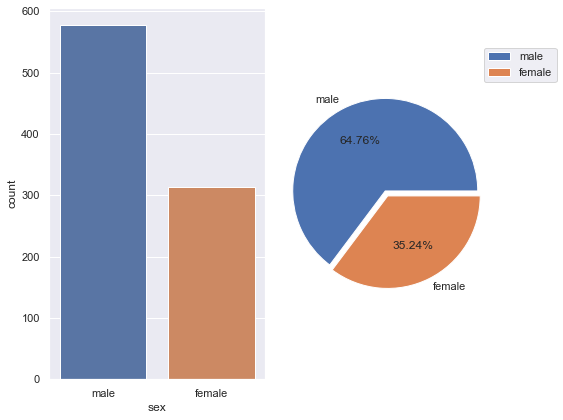

In [33]:
# number based on sex
fig,ax=plt.subplots(1,2,figsize=(8,6))
sns.set_theme(style='darkgrid')
sns.countplot(x='sex',data=df,ax=ax[0])
# plt.show()

sex_count=[len(df[df['sex']==i]) for i in df['sex'].unique()]
explode=[.03,.03]
ax[1].axis('equal')
ax[1].pie(sex_count,labels=df['sex'].unique(),explode=explode,autopct='%1.2f%%')
ax[1].legend(loc=(.95,.8))
plt.tight_layout()
plt.show()




From the plots above we can observe that majority of the passengers are male. They contribute to 64.76% of all the passengers. The females contribute to 35.24% of all the passengers.

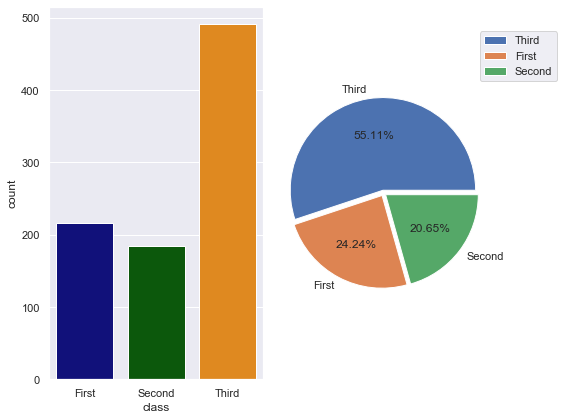

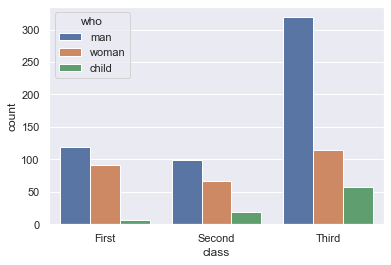

In [34]:
# number based on Pclass
fig,ax=plt.subplots(1,2,figsize=(8,6))
sns.set_theme(style='darkgrid')
sns.countplot(x='class',data=df,ax=ax[0],palette=['#00008b','#006400','#ff8c00'])
# plt.show()

class_count=[len(df[df['class']==i]) for i in df['class'].unique()]
explode=[.03,.03,.03]
ax[1].axis('equal')
ax[1].pie(class_count,labels=df['class'].unique(),explode=explode,autopct='%1.2f%%')
ax[1].legend(loc=(.95,.8))
plt.tight_layout()
plt.show()

sns.set_theme(style='darkgrid')
sns.countplot(x='class',data=df,hue='who')
plt.show()


From above plots we can observe that majority are 'third class' passengers contributing to 55.11% of the population onboard, followed by first and second class respectively. We can also observe that in all the class 'man' are majority and 'child' are minority. Third class has highest number of 'man' and 'woman' than other classes.

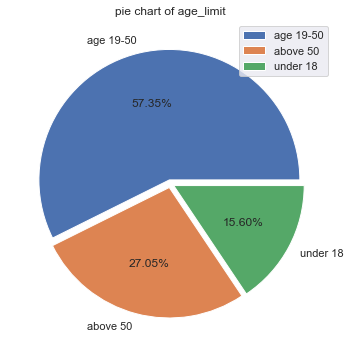

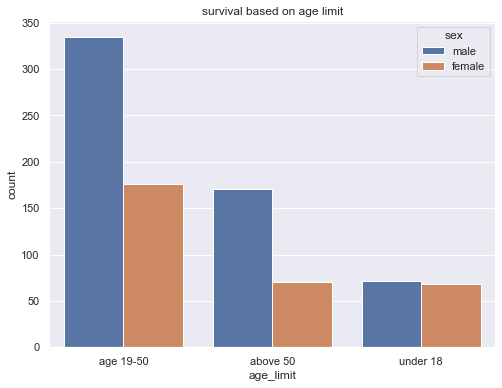

In [35]:
age_limit=[]
for i in range(len(df)):
    if (df.loc[i,'age']<=18):
        age_limit.append('under 18')
    elif ((df.loc[i,'age']>=19)&(df.loc[i,'age']<=50)):
        age_limit.append('age 19-50')
    else:
        age_limit.append('above 50')
df['age_limit']=age_limit

agelimit_count=[len(df[df['age_limit']==i]) for i in df['age_limit'].unique()]
explode=[0.03,0.03,0.03]
plt.figure(figsize=(8,6))
plt.pie(x=agelimit_count,labels=df['age_limit'].unique(),explode=explode,autopct='%1.2f%%')
plt.legend(loc='upper right')
plt.title('pie chart of age_limit')
plt.show()


plt.figure(figsize=(8,6))
sns.set_theme(style='darkgrid')
sns.countplot(x='age_limit',data=df,hue='sex')
plt.title('survival based on age limit')
plt.show()

From the above plots we can observe that age group 19-50 are the highest in number, about 57.35% of the population. Also majority of each age group are males. We can see that for the age group under 18, males and females population is almost equal.

## survival analysis
### number of survival

In [36]:
survived=df[df['survived']==1]
survived_male=df[(df['survived']==1) & (df['sex']=='male')]
survived_female=df[(df['survived']==1) & (df['sex']=='female')]
print(f'a. Total number of survivals onboard was {len(survived)}')


print(f'Out of {len(male1)} male passengers onboard only {len(survived_male)/len(male1)*100:.2f} % male was survived.')


print(f'Out of {len(female1)} female passengers onboard only {len(survived_female)/len(female1)*100:.2f} % female was survived.')

a. Total number of survivals onboard was 342
Out of 577 male passengers onboard only 18.89 % male was survived.
Out of 314 female passengers onboard only 74.20 % female was survived.


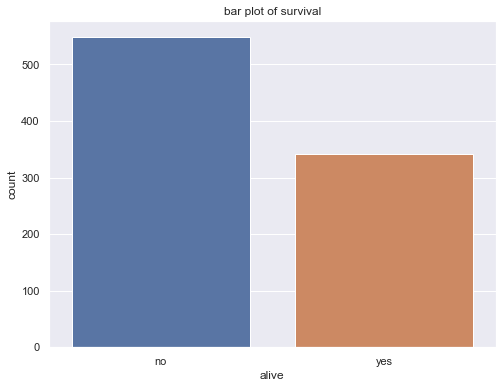

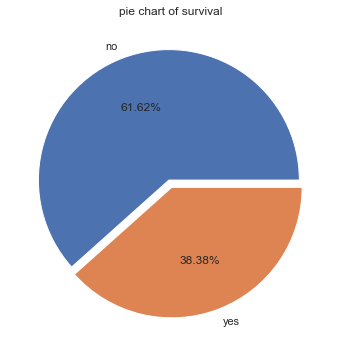

In [37]:
# number of survival
plt.figure(figsize=(8,6))
sns.set_theme(style='darkgrid')
sns.countplot(x='alive',data=df)
plt.title('bar plot of survival')
plt.show()

plt.figure(figsize=(8,6))
sur_count=[len(df[df['alive']==i]) for i in df['alive'].unique()]
plt.pie(x=sur_count,labels=df['alive'].unique(),explode=[0.03,0.03],autopct='%1.2f%%')
plt.title('pie chart of survival')
plt.show()

From the above plots we can observe that majority (61.62%) of the passengers died on titanic. Only 38.38% of 
the passengers survived. 

### survival based on sex

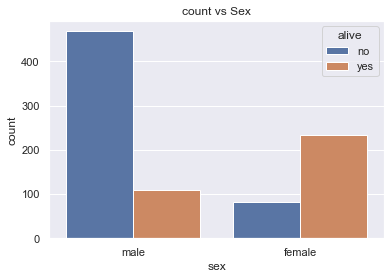

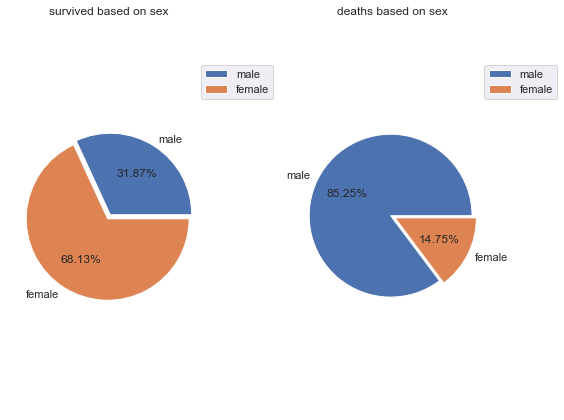

In [38]:
# survival based on sex
sns.countplot(x='sex',data=df,hue='alive')
plt.title('count vs Sex')
plt.show()

fig,ax=plt.subplots(1,2,figsize=(8,6))
survived_sex_count=[len(df_survived[df_survived['sex']==i]) for i in df['sex'].unique()]
explode=[.03,.03]
ax[0].axis('equal')
ax[0].pie(survived_sex_count,labels=df['sex'].unique(),explode=explode,autopct='%1.2f%%')
ax[0].legend(loc=(.95,.8))
ax[0].set_title('survived based on sex')
# plt.tight_layout()

death_sex_count=[len(df_dead[df_dead['sex']==i]) for i in df['sex'].unique()]
explode=[.03,.03]
ax[1].axis('equal')
ax[1].pie(death_sex_count,labels=df['sex'].unique(),explode=explode,autopct='%1.2f%%')
ax[1].legend(loc=(.95,.8))
ax[1].set_title('deaths based on sex')
plt.tight_layout()
plt.show()


From the above charts we can observe that majority of the females survived. We can see that of all the survived passengers 68.13 % were females and of all the dead passengers 85.25 % were males.

## survival based on Pclass

In [39]:

upper=df[df['pclass']==1]
upper_survived=df[(df['pclass']==1) & (df['survived']==1)]
print(f'a. There were total number of {len(upper)} passengers with the upper-class ticket and '
      f'only {len(upper_survived)/len(upper)*100:.2f} % were survived')

upper_male=df[(df['pclass']==1) & (df['sex']=='male')]
print(f'b. Out of {len(upper)} passengers with upper class ticket, {len(upper_male)/len(upper)*100:.2f} % passengers were male')

upper_female=df[(df['pclass']==1) & (df['sex']=='female')]
print(f'b. Out of {len(upper)} passengers with upper class ticket, {len(upper_female)/len(upper)*100:.2f} % passengers were female')

upper_survived_male=df[(df['pclass']==1) & (df['survived']==1) & (df['sex']=='male')]
print(f'd. Out of {len(upper)} passengers with upper class ticket, {len(upper_survived_male)/len(upper)*100:.2f}% male passengers were survived')

upper_survived_female=df[(df['pclass']==1) & (df['survived']==1) & (df['sex']=='female')]
print(f'd. Out of {len(upper)} passengers with upper class ticket, {len(upper_survived_female)/len(upper)*100:.2f}% female passengers were survived')


a. There were total number of 216 passengers with the upper-class ticket and only 62.96 % were survived
b. Out of 216 passengers with upper class ticket, 56.48 % passengers were male
b. Out of 216 passengers with upper class ticket, 43.52 % passengers were female
d. Out of 216 passengers with upper class ticket, 20.83% male passengers were survived
d. Out of 216 passengers with upper class ticket, 42.13% female passengers were survived


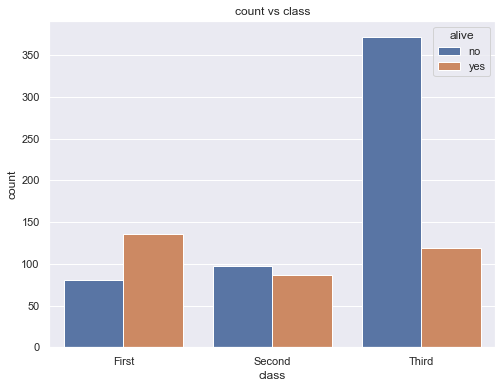

In [40]:
# survival based on Pclass

plt.figure(figsize=(8,6))
sns.set_theme(style='darkgrid')
sns.countplot(x='class',data=df,hue='alive')
plt.title('count vs class')
plt.show()


From the above plot we can observe that majority of 'third class' passengers died. Majority of the 'first class' passengers survived

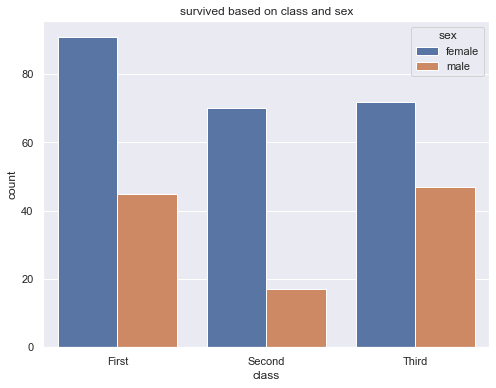

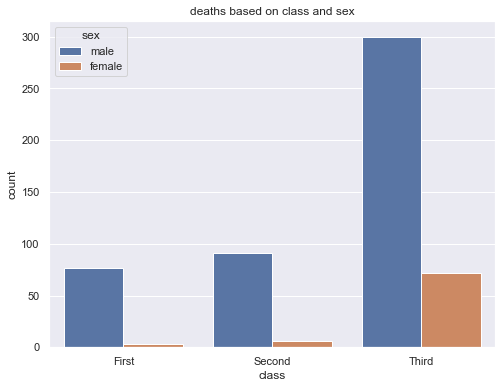

In [41]:

# survived based on sex and class
plt.figure(figsize=(8,6))
sns.set_theme(style='darkgrid')
sns.countplot(x='class',data=df_survived,hue='sex')
plt.title('survived based on class and sex')
plt.show()

# deaths based on sex and class
plt.figure(figsize=(8,6))
sns.set_theme(style='darkgrid')
sns.countplot(x='class',data=df_dead,hue='sex')
plt.title('deaths based on class and sex')
plt.show()

We can observe that of all the survived 'first class' passengers are the highest in number and also majority in all classes that survived are females. Of all the dead 'third class' passengers are the highest in number and also majority in all classes that died are males.

## survival based on age limit

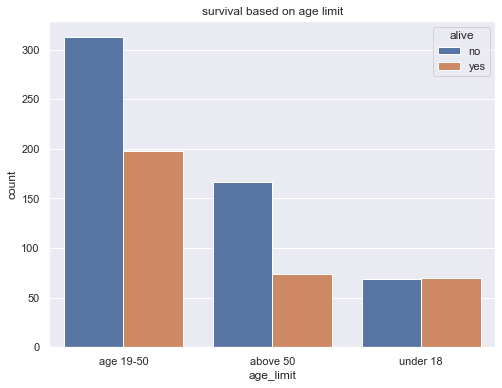

In [42]:
plt.figure(figsize=(8,6))
sns.set_theme(style='darkgrid')
sns.countplot(x='age_limit',data=df,hue='alive')
plt.title('survival based on age limit')
plt.show()

we can observe that population in age 19-50 survived the most and also died the most. The majority of the population in age group above 50 have died.

In [43]:
df['Above50&Male']=np.where(((df['age']>=50) & (df['sex']=='male')),'Yes','No')

male_50=df[df['Above50&Male']=='Yes']
print(f'Number of male passengers above 50 years : {len(male_50)}')

df['Above50&Male&Survived']=np.where(((df['age']>=50) & (df['sex']=='male') & (df['survived']==1)),'Yes','No')

male_50_sur=df[df['Above50&Male&Survived']=='Yes']
print(f'Number of male passengers above 50 years and survived : {len(male_50_sur)}')

print(f'survival % of male onboard above 50 years old : {len(male_50_sur)/len(df)*100:.2f} %')

df['Above50&Female']=np.where(((df['age']>=50) & (df['sex']=='female')),'Yes','No')

female_50=df[df['Above50&Female']=='Yes']
print(f'Number of female passengers above 50 years : {len(female_50)}')

df['Above50&Female&Survived']=np.where(((df['age']>=50) & (df['sex']=='female') & (df['survived']==1)),'Yes','No')

female_50_sur=df[df['Above50&Female&Survived']=='Yes']

print(f'Number of female passengers above 50 years and survived : {len(female_50_sur)}')

print(f'survival % of female onboard above 50 years old : {len(female_50_sur)/len(df)*100:.2f} %')


Number of male passengers above 50 years : 52
Number of male passengers above 50 years and survived : 7
survival % of male onboard above 50 years old : 0.79 %
Number of female passengers above 50 years : 22
Number of female passengers above 50 years and survived : 20
survival % of female onboard above 50 years old : 2.24 %


## main take aways:

### If the passenger is male, adult, third class they have most chance of not surviving the titanic accident. 
### If the passenger is female, first class or children they have most chance of surviving the titanic accident. 